## Кривоногов Н.В., INN, практическое задание № 6

1. Попробуйте обучить нейронную сеть U-Net на любом другом датасете. 
2. Опишите в комментарии - какого результата вы добились от нейросети? Что помогло вам улучшить ее точность?

Был выбран датасет: 

https://www.kaggle.com/carlolepelaars/camvid

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/camvid/CamVid/class_dict.csv
/kaggle/input/camvid/CamVid/val_labels/0016E5_08045_L.png
/kaggle/input/camvid/CamVid/val_labels/0016E5_04740_L.png
/kaggle/input/camvid/CamVid/val_labels/Seq05VD_f03180_L.png
/kaggle/input/camvid/CamVid/val_labels/0016E5_08107_L.png
/kaggle/input/camvid/CamVid/val_labels/0016E5_06900_L.png
/kaggle/input/camvid/CamVid/val_labels/0016E5_02010_L.png
/kaggle/input/camvid/CamVid/val_labels/0006R0_f02550_L.png
/kaggle/input/camvid/CamVid/val_labels/0016E5_08610_L.png
/kaggle/input/camvid/CamVid/val_labels/0001TP_009300_L.png
/kaggle/input/camvid/CamVid/val_labels/0016E5_08047_L.png
/kaggle/input/camvid/CamVid/val_labels/0016E5_01980_L.png
/kaggle/input/camvid/CamVid/val_labels/0001TP_009930_L.png
/kaggle/input/camvid/CamVid/val_labels/0006R0_f01950_L.png
/kaggle/input/camvid/CamVid/val_labels/0006R0_f01980_L.png
/kaggle/input/camvid/CamVid/val_labels/Seq05VD_f02280_L.png
/kaggle/input/camvid/CamVid/val_labels/0016E5_07991_L.png
/kaggle/input/camvid

In [2]:
import matplotlib.pyplot as plt
from pathlib import Path
from keras.preprocessing import image
import tensorflow as tf

from keras.layers import Input, Conv2D, BatchNormalization, MaxPooling2D, Conv2DTranspose, UpSampling2D
from keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [3]:
import keras.backend as K


def dice_coef(y_true, y_pred):
    return (2. * K.sum(y_true * y_pred) + 1) / (K.sum(y_true) + K.sum(y_pred) + 1)

In [4]:
class_dict = pd.read_csv('../input/camvid/CamVid/class_dict.csv')

path_train = '../input/camvid/CamVid/train/'
path_train_labels = '../input/camvid/CamVid/train_labels/'
path_test = '../input/camvid/CamVid/test/'
path_test_labels = '../input/camvid/CamVid/test_labels/'
path_val = '../input/camvid/CamVid/val/'
path_val_labels = '../input/camvid/CamVid/val_labels/'


train_images_paths = list(Path(path_train).iterdir())

In [5]:
single_image = tf.keras.utils.load_img(train_images_paths[0])
image_size = (int(single_image.size[0]/2), single_image.size[1])
image_size

(480, 720)

In [6]:
train_imgs_paths = list(sorted(Path(path_train).iterdir()))
train_masks_paths = list(sorted(Path(path_train_labels).iterdir()))
test_imgs_paths = list(sorted(Path(path_test).iterdir()))
test_masks_paths = list(sorted(Path(path_test_labels).iterdir()))
val_imgs_paths = list(sorted(Path(path_val).iterdir()))
val_masks_paths = list(sorted(Path(path_val_labels).iterdir()))

In [7]:
image_size = (128, 192)

In [8]:
train_images = []
train_masks = []

for i_img, i_mask in zip(train_imgs_paths, train_masks_paths):
    train_images.append(tf.keras.utils.load_img(i_img, target_size=image_size))
    train_masks.append(tf.keras.utils.load_img(i_mask, target_size=image_size))

In [9]:
test_images = []
test_masks = []

for i_img, i_mask in zip(test_imgs_paths, test_masks_paths):
    test_images.append(tf.keras.utils.load_img(i_img, target_size=image_size))
    test_masks.append(tf.keras.utils.load_img(i_mask, target_size=image_size))

In [10]:
val_images = []
val_masks = []

for i_img, i_mask in zip(val_imgs_paths, val_masks_paths):
    val_images.append(tf.keras.utils.load_img(i_img, target_size=image_size))
    val_masks.append(tf.keras.utils.load_img(i_mask, target_size=image_size))

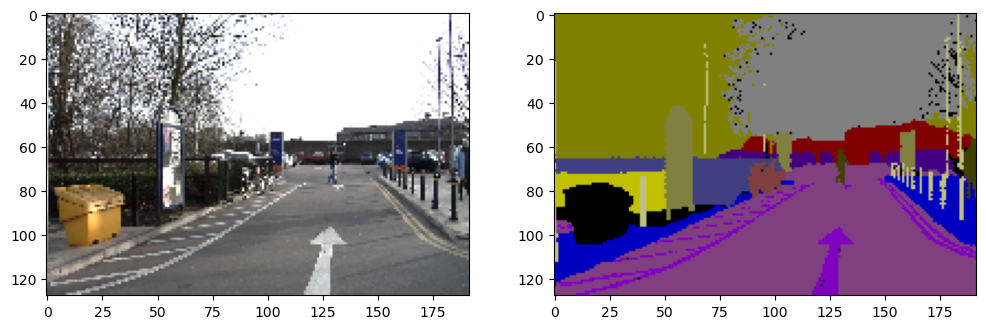

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(12, 12))
ax[0].imshow(train_images[80].convert('RGBA'))
ax[1].imshow(train_masks[80].convert('RGBA'))

In [12]:
X_train = []

for img in train_images:
    x = tf.keras.utils.img_to_array(img)
    X_train.append(x)

X_train = np.array(X_train)
print(X_train.shape)

(369, 128, 192, 3)


In [13]:
X_test = []

for img in test_images:
    x = tf.keras.utils.img_to_array(img)
    X_test.append(x)

X_test = np.array(X_test)
print(X_test.shape)

(232, 128, 192, 3)


In [14]:
X_val = []

for img in val_images:
    x = tf.keras.utils.img_to_array(img)
    X_val.append(x)

X_val = np.array(X_val)
print(X_val.shape)

(100, 128, 192, 3)


In [15]:
class_dict

,name,r,g,b
0,Animal,64,128,64
1,Archway,192,0,128
2,Bicyclist,0,128,192
3,Bridge,0,128,64
4,Building,128,0,0
5,Car,64,0,128
6,CartLuggagePram,64,0,192
7,Child,192,128,64
8,Column_Pole,192,192,128
9,Fence,64,64,128


In [16]:
arr_col = []

for r, g, b in zip(class_dict['r'], class_dict['g'], class_dict['b']):
    arr_col.append([r, g, b]) 

In [17]:
import cv2


def Color2index(y, arr_col=arr_col):

    y_ind = np.zeros((y.shape[0], y.shape[1]))
    y_cat = np.zeros((y.shape[0], y.shape[1], len(arr_col)))
    i = 1
    for i_color in arr_col:
        ind_i = np.where(
            (y[..., 0] == i_color[0]) 
            & (y[..., 1] == i_color[1])
            & (y[..., 2] == i_color[2])
        )
        y_ind[ind_i[0], ind_i[1]] = i
        y_cat[ind_i[0], ind_i[1], i-1] = 1 
        i += 1
    
    return y_cat, y_ind#, i-1

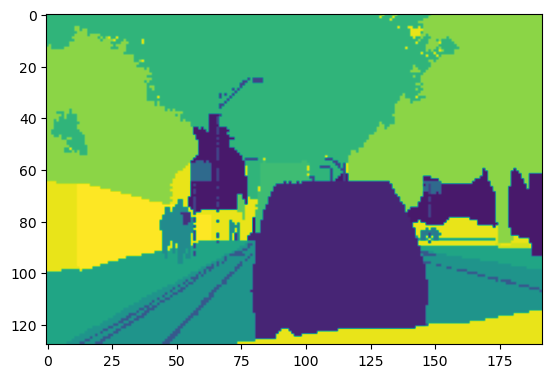

In [18]:
cat_yi, ind_yi = Color2index(tf.keras.utils.img_to_array(train_masks[3]))
plt.imshow(ind_yi)
plt.show()

In [19]:
ind_yi

array([[22., 22., 22., ..., 27., 27., 27.],
       [22., 22., 22., ..., 27., 27., 27.],
       [22., 22., 22., ..., 27., 27., 27.],
       ...,
       [20., 20., 20., ..., 31., 31., 31.],
       [20., 20., 20., ..., 31., 31., 31.],
       [20., 20., 20., ..., 31., 31., 31.]])

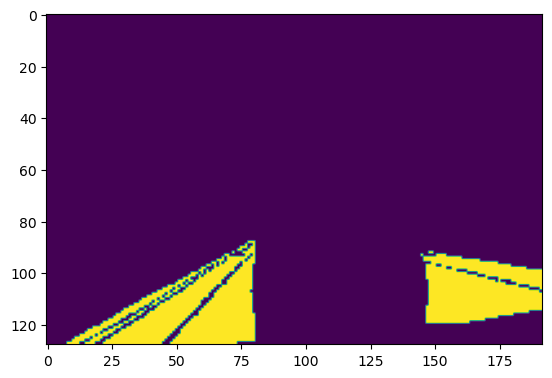

In [20]:
plt.imshow(cat_yi[..., 17])
plt.show()

In [21]:
cat_yi.shape

(128, 192, 32)

In [22]:
y_train = []

for mask in train_masks:
    y_cat, _ = Color2index(tf.keras.utils.img_to_array(mask))
    y_train.append(y_cat)

y_train = np.array(y_train)

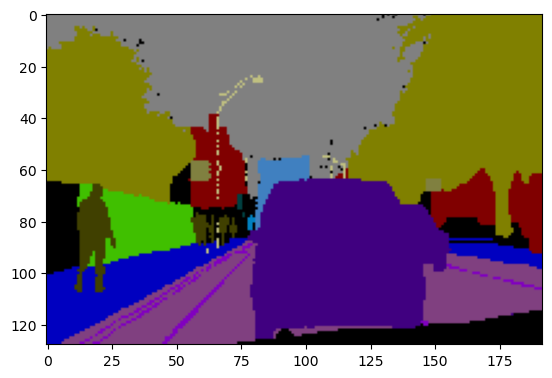

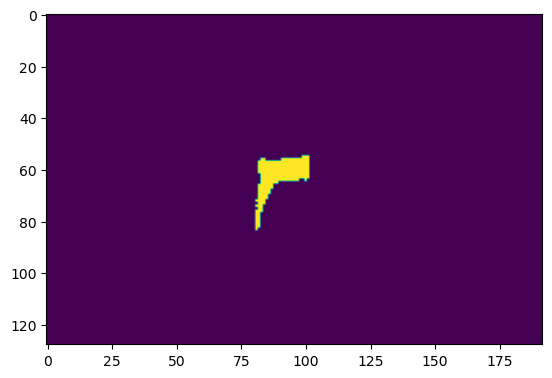

In [23]:
n = 0
plt.imshow(train_masks[n].convert('RGBA'))
plt.show()
img = y_train[n][..., 22]

plt.imshow(img)
plt.show()

In [24]:
y_test = []

for mask in test_masks:
    y_cat, _ = Color2index(tf.keras.utils.img_to_array(mask))
    y_test.append(y_cat)

y_test = np.array(y_test)

In [25]:
y_val = []

for mask in val_masks:
    y_cat, _ = Color2index(tf.keras.utils.img_to_array(mask))
    y_val.append(y_cat)

y_val = np.array(y_val)


In [26]:
print(X_train.shape)
print(y_train.shape)

(369, 128, 192, 3)
(369, 128, 192, 32)


In [27]:
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.models import Model, Sequential
from keras.layers import (Activation, Input, MaxPooling2D, BatchNormalization, 
                          Conv2D, Conv2DTranspose, concatenate)
from tensorflow.keras.utils import plot_model


def unet(num_classes=32, input_shape=(128, 162, 3)):    
    pre_trained_model = VGG16(input_shape=input_shape, include_top=False, weights='imagenet')

    for layer in pre_trained_model.layers[:-5]:
        layer.trainable = False

    x = pre_trained_model.layers[13].output
    block_4_out = pre_trained_model.layers[10].output
    block_3_out = pre_trained_model.layers[6].output
    block_2_out = pre_trained_model.layers[3].output
    img_input = pre_trained_model.inputs
    print(block_4_out)
    print(block_3_out)
    print(block_2_out)
   
    # UP 1

    # добавили перенос из VGG16
    x = concatenate([x, block_4_out])
    x = Conv2D(256, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(256, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)


    # UP 2
    x = Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    # добавили перенос из VGG16
    x = concatenate([x, block_3_out])
    x = Conv2D(256, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(256, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)


    # UP 3
    x = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    # добавили перенос из VGG16
    x = concatenate([x, block_2_out])
    x = Conv2D(128, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(128, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)


    # UP 4
    x = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    x = Conv2D(64, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    x = Conv2D(64, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(num_classes, (3, 3), activation='softmax', padding='same')(x)

    model = Model(img_input, x)
    return model

58889256/58889256 [==============================] - 0s 0us/step
KerasTensor(type_spec=TensorSpec(shape=(None, 16, 24, 256), dtype=tf.float32, name=None), name='block3_pool/MaxPool:0', description="created by layer 'block3_pool'")
KerasTensor(type_spec=TensorSpec(shape=(None, 32, 48, 128), dtype=tf.float32, name=None), name='block2_pool/MaxPool:0', description="created by layer 'block2_pool'")
KerasTensor(type_spec=TensorSpec(shape=(None, 64, 96, 64), dtype=tf.float32, name=None), name='block1_pool/MaxPool:0', description="created by layer 'block1_pool'")


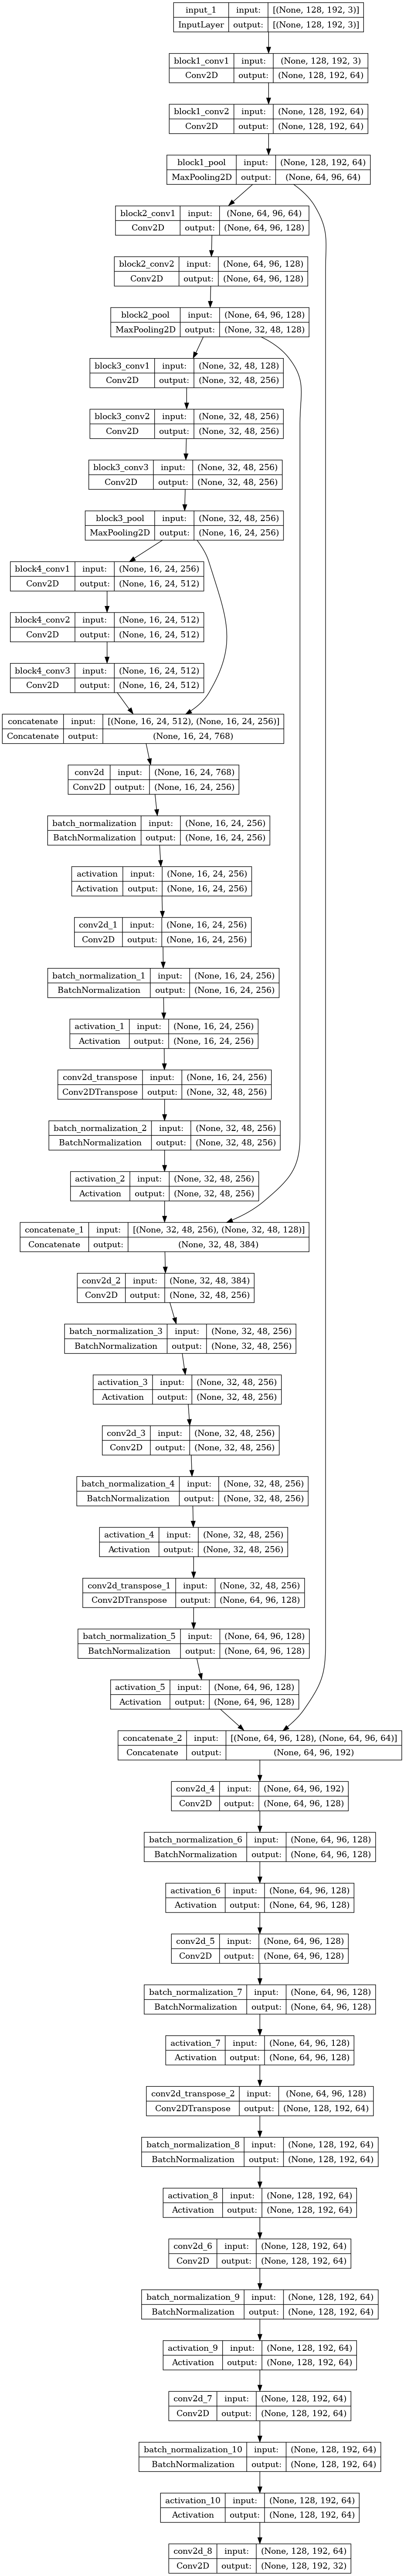

In [28]:
model = unet(32, (128, 192, 3))

plot_model(model, to_file='model.png', show_shapes=True)

In [29]:
model.compile(optimizer=Adam(),
                loss='categorical_crossentropy',
                metrics=[dice_coef])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 192, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 128, 192, 64  1792        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv2 (Conv2D)          (None, 128, 192, 64  36928       ['block1_conv1[0][0]']           
                                )                                                             

In [30]:
sample_image = X_test[1]
sample_mask = y_test[1]

In [31]:
import keras
from IPython.display import clear_output


def show_predictions(model):
    pred_mask = model.predict(sample_image[None])[..., 16]
    print(pred_mask.shape)

    fig, ax = plt.subplots(1, 3, figsize=(15, 8))

    ax[0].imshow(sample_image / 255.0)
    ax[1].imshow(sample_mask[..., 16])
    ax[2].imshow(np.squeeze(pred_mask, axis=0))
    plt.show()


class DisplayCallback(keras.callbacks.Callback):
    def __init__(self, patience=1):
        super().__init__()
        self.patience = patience
    
    def on_train_begin(self, logs=None):
        self.wait = 0

    def on_epoch_end(self, epoch, logs=None):
        self.wait += 1
        if self.wait >= self.patience:
            clear_output(wait=True)
            show_predictions(self.model)
            print(f'\nSample Prediction after epoch {epoch+1}')
            self.wait = 0

1/1 [==============================] - 1s 939ms/step
(1, 128, 192)


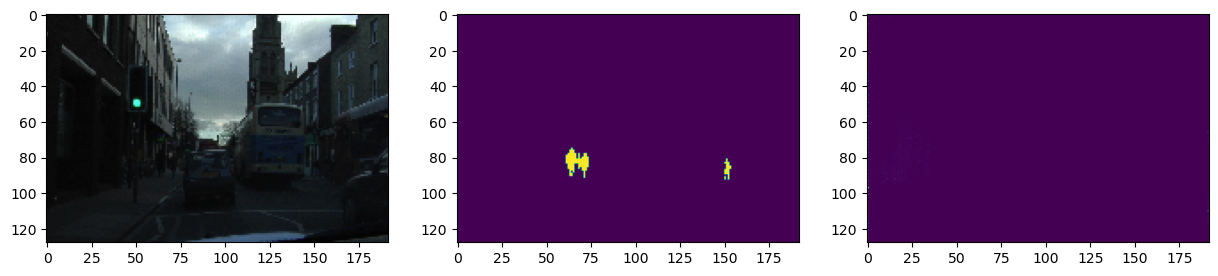

In [32]:
show_predictions(model)

1/1 [==============================] - 0s 335ms/step
(1, 128, 192)


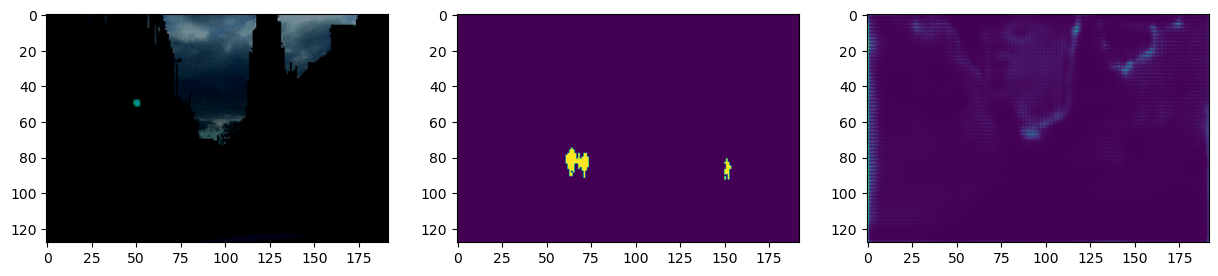


Sample Prediction after epoch 20
37/37 [==============================] - 380s 10s/step - loss: 0.3813 - dice_coef: 0.8307 - val_loss: 0.8062 - val_dice_coef: 0.7412


In [33]:
history = model.fit(preprocess_input(X_train), y_train,
                      epochs=20,
                      batch_size=10,
                      validation_data=(preprocess_input(X_test), y_test),
                      callbacks=[DisplayCallback(patience=5)])

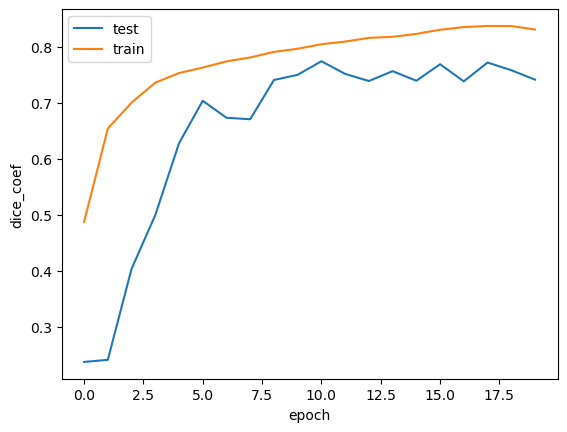

In [34]:
plt.plot(history.history['val_dice_coef'], label='test')
plt.plot(history.history['dice_coef'], label='train')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('dice_coef')
plt.show()

In [35]:
pred = model.predict(X_val)
print(pred.shape)

4/4 [==============================] - 32s 7s/step
(100, 128, 192, 32)


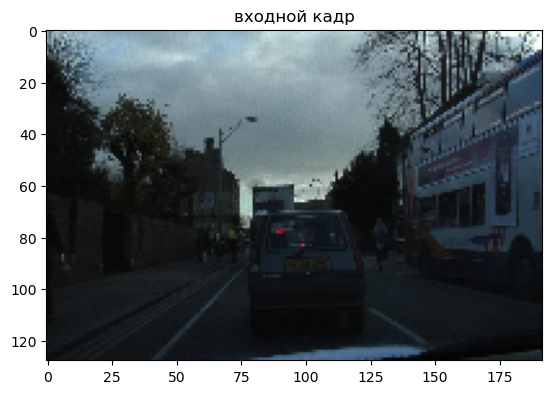

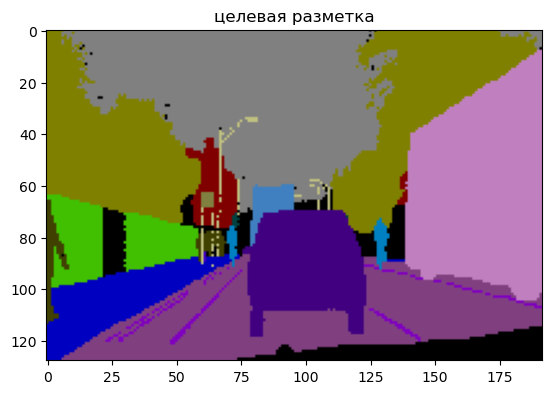

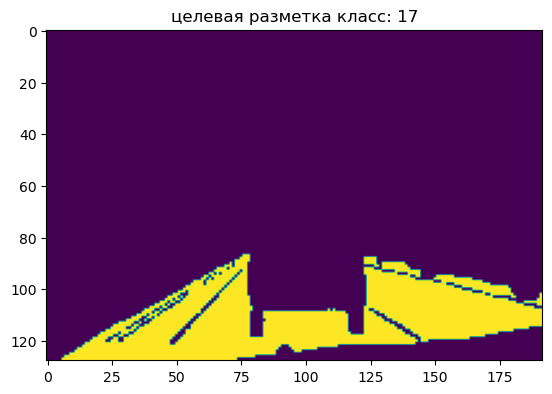

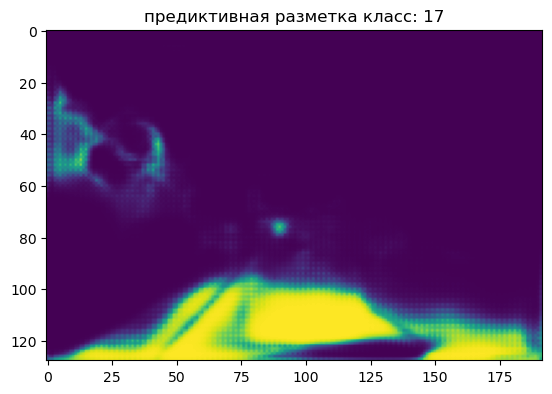

In [36]:
n = 1
class_ = 17
plt.imshow(val_images[n].convert('RGBA'))
plt.title('входной кадр')
plt.show()
plt.imshow(val_masks[n].convert('RGBA'))
plt.title('целевая разметка')
plt.show()
img = y_val[n][..., class_]
plt.imshow(img)
plt.title('целевая разметка класс: ' + str(class_))
plt.show()
img = pred[n][..., class_]
plt.imshow(img)
plt.title('предиктивная разметка класс: ' + str(class_))
plt.show()

### Улучшить качество обучения помогает грамотное выстраиваие архитектуры сети и количество эпох обучения: чем их больше - тем лучше метрика.